<a href="https://colab.research.google.com/github/shehbaz1033/Sports-Car-Price-Prediction/blob/main/DataScienceFinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

engine_size_mapping = {
    'Electric':2,
    'Electric Motor':2,
    '1.5 + Electric':1.5,
    '-':0,
    'Electric (tri-motor)':3,
    'Electric (93 kWh)':2,
    'Electric (100 kWh)':3,
    'Hybrid (4.0)':4,
    'Hybrid':3,
    '2.0 (Electric)':2,
    '4.0 (Hybrid)':4
}

df = pd.read_csv("Sport car price.csv")

df['Engine Size (L)'] = df['Engine Size (L)'].replace(engine_size_mapping)
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'].str.replace(',', '').str.rstrip('+'), errors='coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'].str.replace(',', '').str.rstrip('+'), errors='coerce')
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'].str.replace('<', '').replace(',', ''), errors='coerce')
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)
df['Year'] = df['Year'].astype(int)
df['Engine Size (L)'].fillna(df['Engine Size (L)'].mean(), inplace=True)
df['Torque (lb-ft)'].fillna(df['Torque (lb-ft)'].mean(), inplace=True)

df = df[(df['Horsepower']*df['Torque (lb-ft)']/df['Price (in USD)']<6) & (df['Horsepower']*df['Torque (lb-ft)']/df['Price (in USD)']>0.5)]

selected_features = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']
df[selected_features] = df[selected_features].astype(float)

joblib.dump(df, 'modified_df.joblib')

X = df.drop('Price (in USD)', axis=1)
y = df['Price (in USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Car Make', 'Car Model']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(criterion="absolute_error"))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Trained on all data and model saved
model2 = Pipeline([
                    ('preprocessor', preprocessor),
                    ('regressor', RandomForestRegressor(criterion="absolute_error"))
                ])
model2.fit(X, y)

joblib.dump(model2, 'random_forest_model.joblib')

<ipython-input-1-1609deca3171>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_features] = df[selected_features].astype(float)


['random_forest_model.joblib']

In [ ]:
descriptive_stats = df.describe(include='all')
descriptive_stats


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,886,886,886.000000,886.000000,886.000000,886.000000,886.000000,8.860000e+02
unique,34,154,NaN,NaN,NaN,NaN,NaN,NaN
top,Porsche,GT,NaN,NaN,NaN,NaN,NaN,NaN
freq,87,55,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2021.264108,4.118737,607.861174,519.147529,3.569187,3.192240e+05
std,NaN,NaN,0.967377,1.365615,301.871342,236.895862,0.779946,5.957333e+05
min,NaN,NaN,2014.000000,0.000000,181.000000,151.000000,1.800000,2.683000e+04
25%,NaN,NaN,2021.000000,3.500000,444.000000,398.000000,3.000000,7.636250e+04
50%,NaN,NaN,2021.000000,4.000000,573.000000,479.000000,3.500000,1.460000e+05
75%,NaN,NaN,2022.000000,5.000000,647.000000,568.000000,4.000000,2.446500e+05


In [ ]:
import joblib
import pandas as pd
model = joblib.load('random_forest_model.joblib')
new_data = pd.read_excel("Live_nonseen_data.xlsx")
predictions = model.predict(new_data)
print(predictions)

[203993.215 200443.15  157100.5   190398.8    49406.95 ]


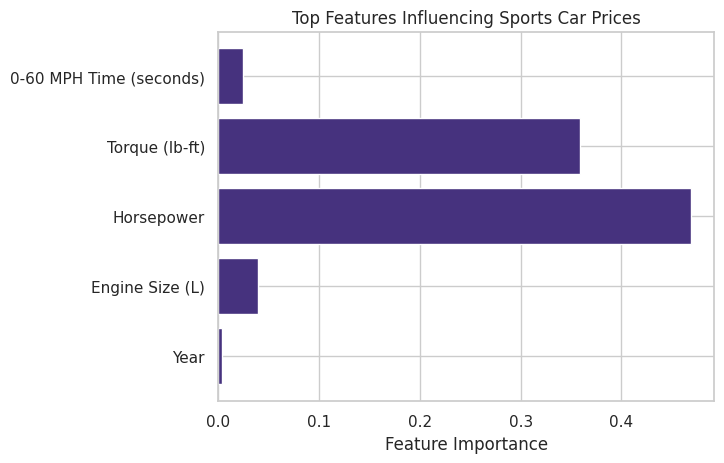

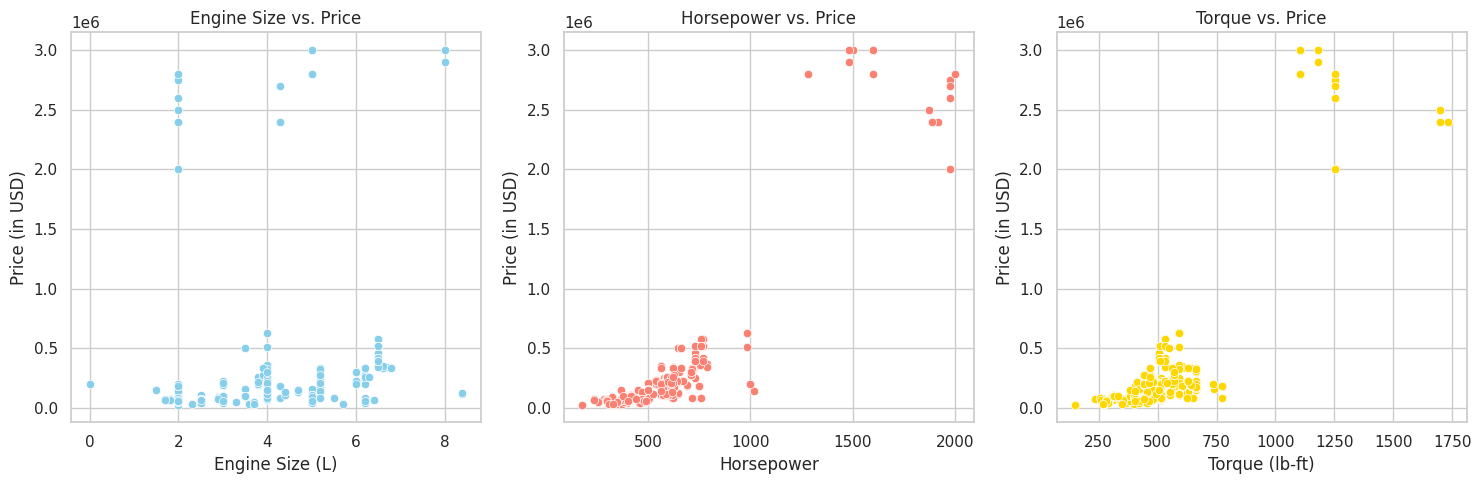

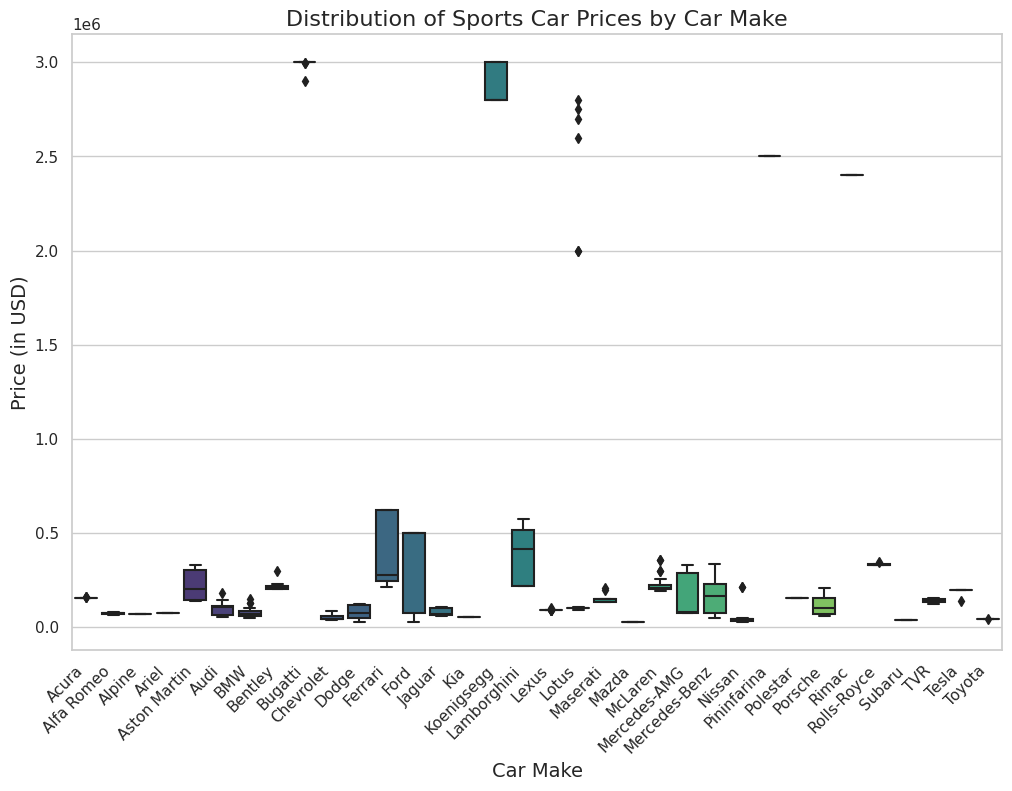

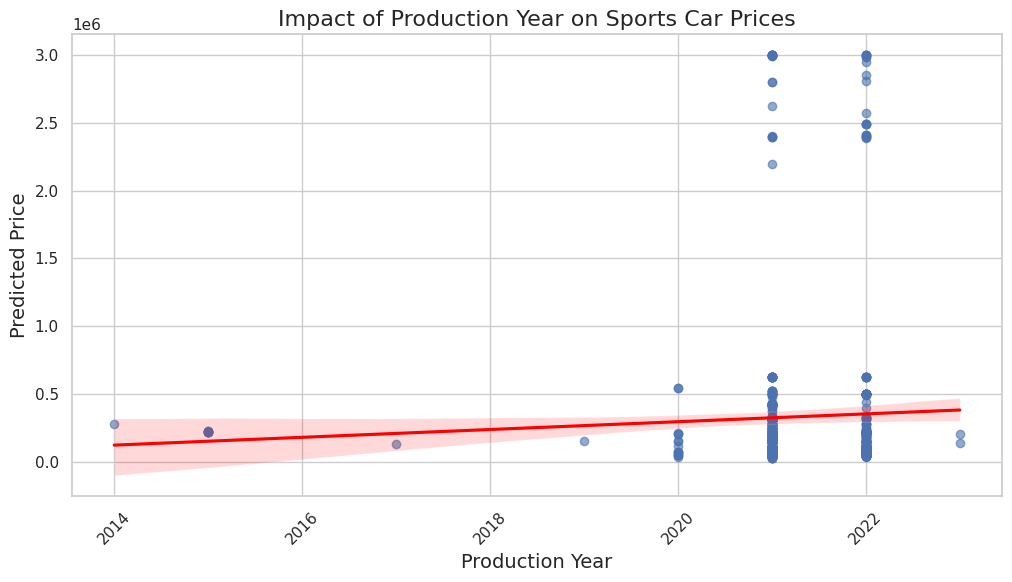

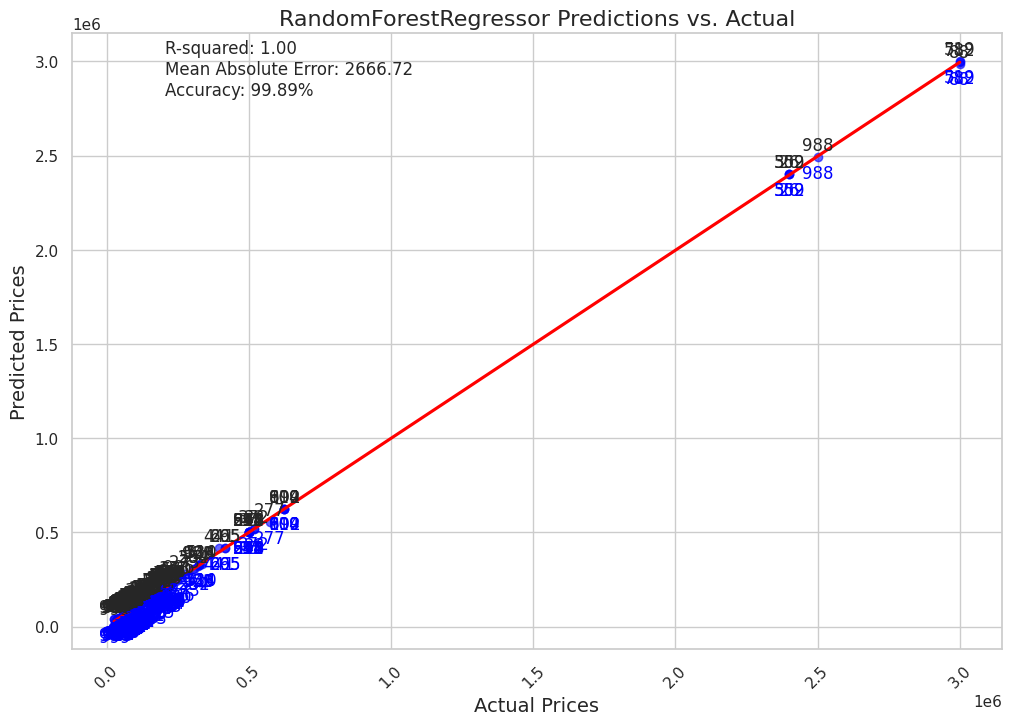

In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
model = joblib.load('random_forest_model.joblib')
df = joblib.load('modified_df.joblib')

X = df.drop('Price (in USD)', axis=1)
y = df['Price (in USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ANSWER 1
feature_importances = model.named_steps['regressor'].feature_importances_
sorted_features = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']
sorted_importances = feature_importances[-5:]
plt.barh(sorted_features, sorted_importances, align='center')
plt.yticks(sorted_features)
plt.title('Top Features Influencing Sports Car Prices')
plt.xlabel('Feature Importance')
plt.show()

# ANSWER 2
sns.set_palette("viridis")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='Engine Size (L)', y='Price (in USD)', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Engine Size vs. Price')


sns.scatterplot(x='Horsepower', y='Price (in USD)', data=df, ax=axes[1], color='salmon')
axes[1].set_title('Horsepower vs. Price')

sns.scatterplot(x='Torque (lb-ft)', y='Price (in USD)', data=df, ax=axes[2], color='gold')
axes[2].set_title('Torque vs. Price')

plt.tight_layout()

plt.show()


# ANSWER 3
df_sorted = df.sort_values(by='Car Make')

sns.set_palette("viridis")

plt.figure(figsize=(12, 8))

sns.boxplot(x='Car Make', y='Price (in USD)', data=df_sorted, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Sports Car Prices by Car Make', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)
plt.show()


# ANSWER 4
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.regplot(x=X_train['Year'], y=model.predict(X_train), scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

plt.title('Impact of Production Year on Sports Car Prices', fontsize=16)
plt.xlabel('Production Year', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

# ANSWER 5

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = 100 - abs((y_test.mean() - y_pred.mean()) / y_test.mean() * 100)

sns.set_palette("viridis")

plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6, 'color': 'blue', 'marker': 'o'}, line_kws={'color': 'red'})

plt.title('RandomForestRegressor Predictions vs. Actual', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.xticks(rotation=45)
plt.text(0.1, 0.9, f'R-squared: {r2:.2f}\nMean Absolute Error: {mae:.2f}\nAccuracy: {accuracy:.2f}%', transform=plt.gca().transAxes, fontsize=12)

for i, txt in enumerate(list(X_test.index)):
    plt.annotate(txt, (list(y_test)[i], list(y_pred)[i]), textcoords="offset points", xytext=(0,5), ha='center')

for i, txt in enumerate(list(X_test.index)):
    plt.annotate(txt, (list(y_test)[i], list(y_pred)[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='blue')

plt.show()
